В цьому ДЗ ми потренуємось будувати візуалізації з використанням бібліотеки `maplotlib` для візуалізації даних в `pandas.DataFrame`.

# Опис бізнес задачі та набору даних

Набір даних "Yulu" містить інформацію про попит на спільні електровелосипеди в Індії, що надаються провідним індійським постачальником мікромобільності Yulu. Ця компанія пропонує унікальні транспортні засоби для щоденних поїздок з метою усунення транспортних заторів в Індії та забезпечення безпечного, зручного та доступного рішення для пересування. Зони Yulu розташовані в оптимальних місцях, включаючи станції метро, автобусні зупинки, офісні простори, житлові райони та корпоративні офіси, щоб полегшити поїздки на перші та останні кілометри.

Останнім часом Yulu зіткнулася зі значними зниженнями доходів, тому компанія звернулася до консалтингової фірми з метою зрозуміти, від яких факторів залежить попит на ці спільні електровелосипеди, особливо на індійському ринку.

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів


0. Імпортуйте бібліотеки `matplotlib.pyplot` та `pandas`


In [1]:
import matplotlib.pyplot as plt
import pandas as pd

1. Завантажте дані з файла `yulu_rental.csv` у pandas.DataFrame `df`.

In [2]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [3]:
df = pd.read_csv('/drive/MyDrive/Colab_Notebooks/Data_Analyst_Course_HP/Module_4/Data_M4/yulu_rental.csv')

2. Виведіть

- перші 3 записи з набору даних
- типи даних в наборі даних
- розміри набору даних

In [4]:
df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [5]:
df.dtypes

,0
datetime,object
season,int64
holiday,int64
workingday,int64
weather,int64
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
df_shape = df.shape
print(f'The dataset contains {df.shape[0]} rows and {df.shape[1]} columns')

The dataset contains 10886 rows and 12 columns


In [8]:
df.memory_usage()

,0
Index,128
datetime,87088
season,87088
holiday,87088
workingday,87088
weather,87088
temp,87088
atemp,87088
humidity,87088
windspeed,87088


In [9]:
df.memory_usage().sum()

1045184

In [10]:
bytes_in_total = df.memory_usage().sum()
megabytes_in_total = bytes_in_total / (1024 * 1024)
print('The dataset takes up {} Mb in memory'.format(megabytes_in_total))

The dataset takes up 0.99676513671875 Mb in memory


Перетворимо колонку `datetime` на тип даних `pd.datetime` - це нам доопоможе в подальшій роботі. Просто запустіть колонку нижче і занатуйте собі цей метод роботи з колонкою, в якій міститься дата і час.
Наша колонка тепер стане таймпстемпом і для неї став доступний функціонал, описаний тут

https://pandas.pydata.org/docs/reference/api/pandas.Timestamp.html

Наприклад, ми можемо легко виокремити дату, день тижня, чи це робочий день, чи ні.

In [11]:
df['datetime'] = pd.to_datetime(df.datetime)

In [12]:
df.dtypes

,0
datetime,datetime64[ns]
season,int64
holiday,int64
workingday,int64
weather,int64
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


In [13]:
df['datetime'].dt.year       # get years

,datetime
0,2011
1,2011
2,2011
3,2011
4,2011
...,...
10881,2012
10882,2012
10883,2012
10884,2012


In [14]:
df['datetime'].dt.month      # get month

,datetime
0,1
1,1
2,1
3,1
4,1
...,...
10881,12
10882,12
10883,12
10884,12


In [15]:
df['datetime'].dt.day        # get days

,datetime
0,1
1,1
2,1
3,1
4,1
...,...
10881,19
10882,19
10883,19
10884,19


3. З допомогою matplotlib побудуйте найпростіший лінійний графік кількості зареєстрованих користувачів (`registered`) на кожну годину.

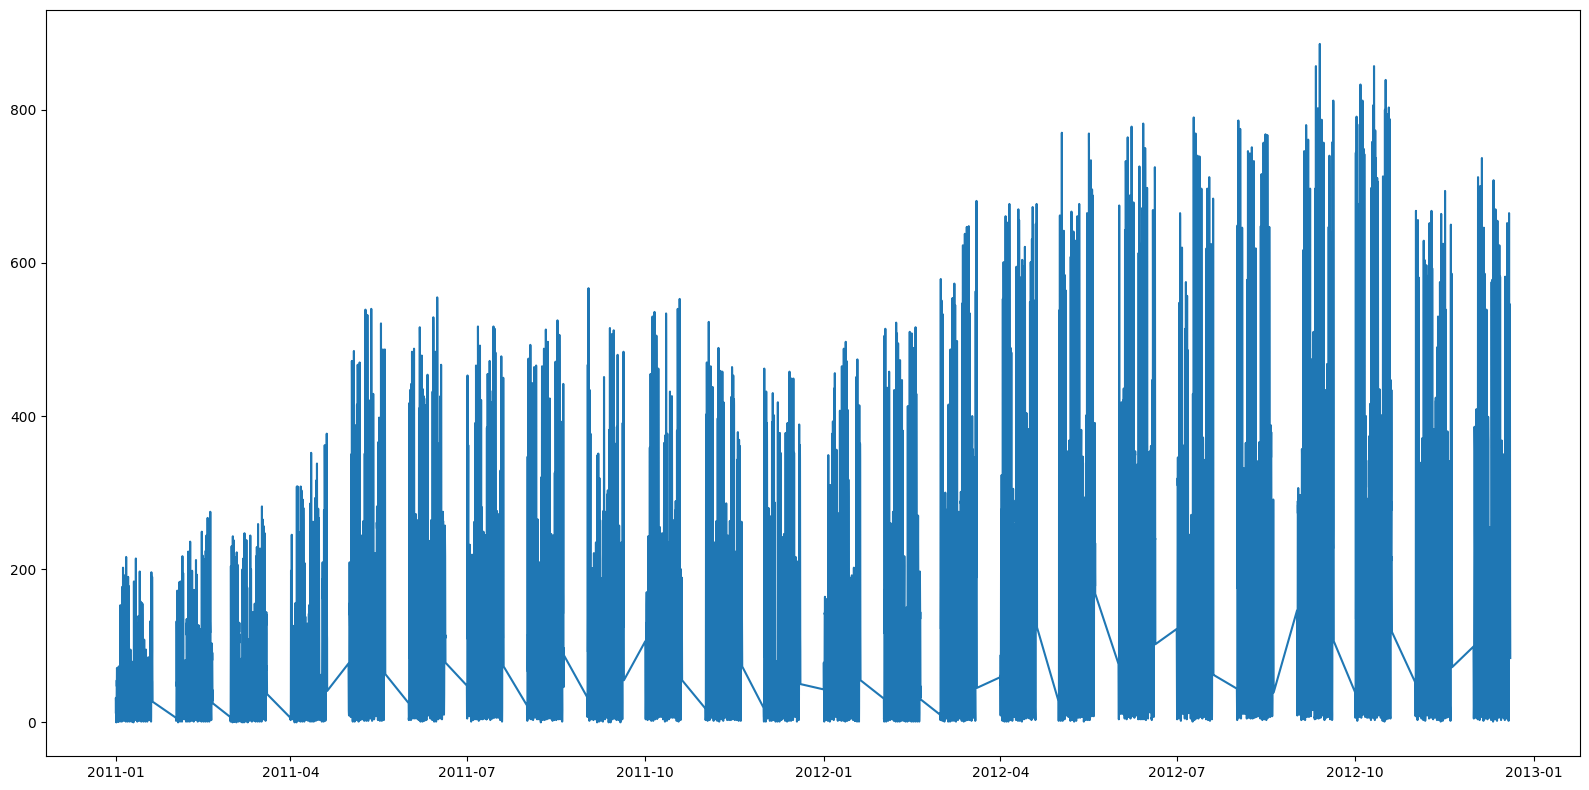

In [23]:
# Solution
# Step 1. Create the plot
plt.figure(figsize=(16, 8))
plt.plot(df['datetime'], df['registered'])

# Step 2. Adjust layout to prevent label cutoff
plt.tight_layout()


Має вийти щось таке:
![](https://drive.google.com/uc?export=view&id=1WX6s9qmiwq_1TSHQtRX0bPL8sT6Gw2BH)

4. Графік виглядає так собі, правда? Давайте загрегуємо дані по дням. Для цього запустіть наступний код аби створити колонку "дата" (без часу) і після цього напишіть самостійно код, аби загрегувати дані і отримати кількість зарестрованих клієнтів на день. Ваша фінальна структура (запишіть її в змінну `df_registered_by_date`) даних має містити дві колонки: дату і кількість зареєстрованих користувачів на цей день.

In [18]:
# Step 1. Run existed code to create "date" column
df['date'] = df.datetime.dt.date

# Step 2. Create df_registered_by_date with aggregated data
df_registered_by_date = df.groupby('date')['registered'].sum().reset_index()

# Step 3. Convert date to string format to match the screenshot
df_registered_by_date['date'] = df_registered_by_date['date'].astype(str)

# Show result
df_registered_by_date


,date,registered
0,2011-01-01,654
1,2011-01-02,670
2,2011-01-03,1229
3,2011-01-04,1454
4,2011-01-05,1518
...,...,...
451,2012-12-15,4280
452,2012-12-16,3248
453,2012-12-17,4373
454,2012-12-18,5124


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1DL7Y-R7_CBWNlQNAnMyAoU8hR2MdF5v7)


5. Тепер побудуйте лінійний графік з matplotlib для даних в `df_registered_by_date`.

  Додайте наступну частину до графіку аби зробити підписи за віссю ОХ більш читаємими

  `plt.xticks(rotation=45, ha='right')`

  Після побудови графіку проаналізуйте його та напишіть, які тенденції щодо зміни кількості зареєстрованих користувачів в часі ви бачите і чому так може бути?

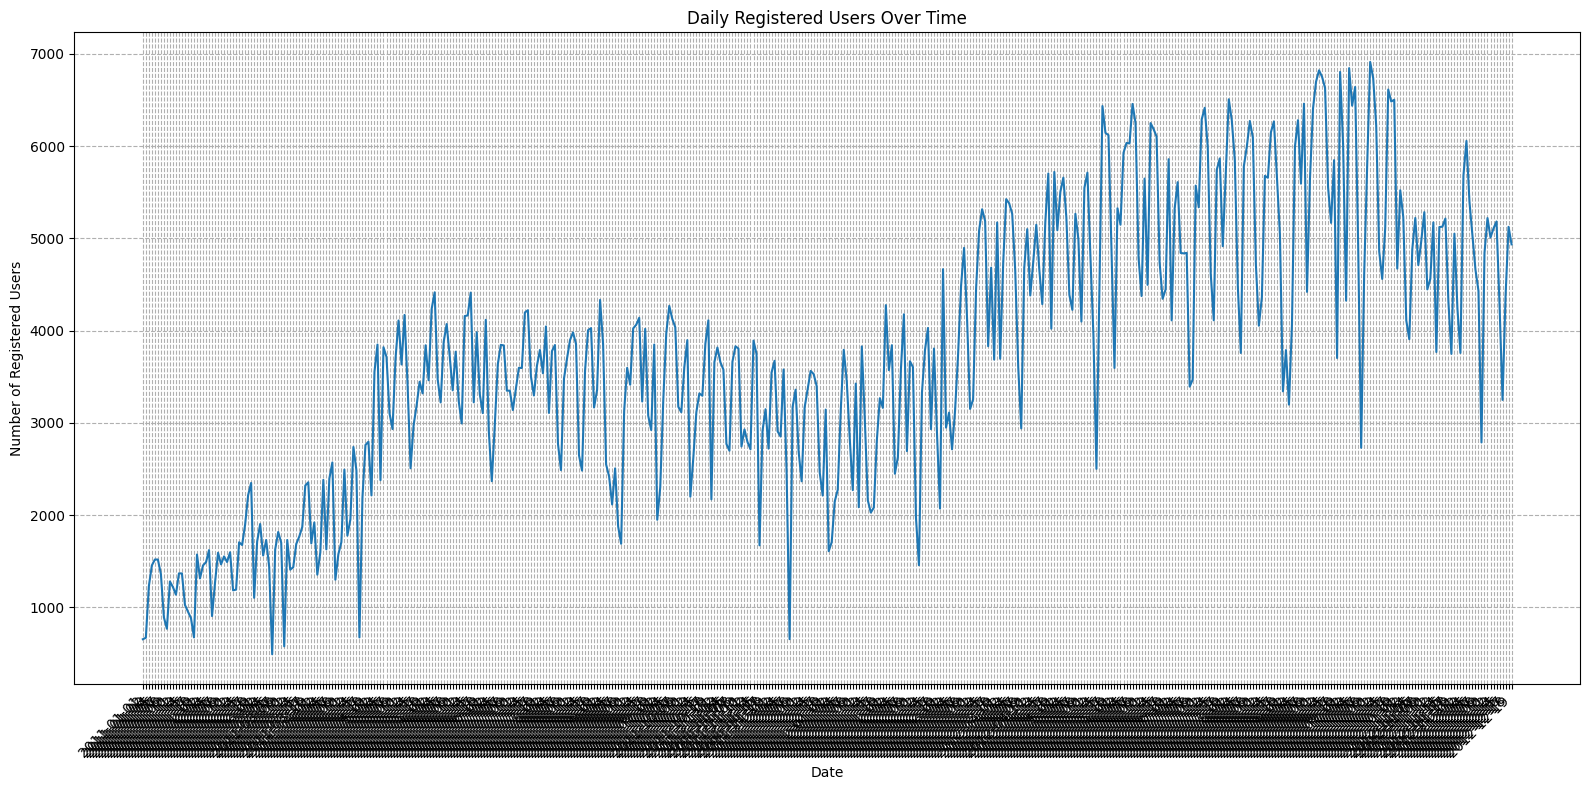

In [21]:
# Solution 1.
# Step 1. Create the plot
plt.figure(figsize=(16, 8))
plt.plot(df_registered_by_date['date'], df_registered_by_date['registered'])

# Step 2. Add labels and title
plt.xlabel('Date')
plt.ylabel('Number of Registered Users')
plt.title('Daily Registered Users Over Time')
plt.grid(True, linestyle='--')

plt.xticks(rotation=45, ha='right')

# Step 3. Prevent label cutoff
plt.tight_layout()


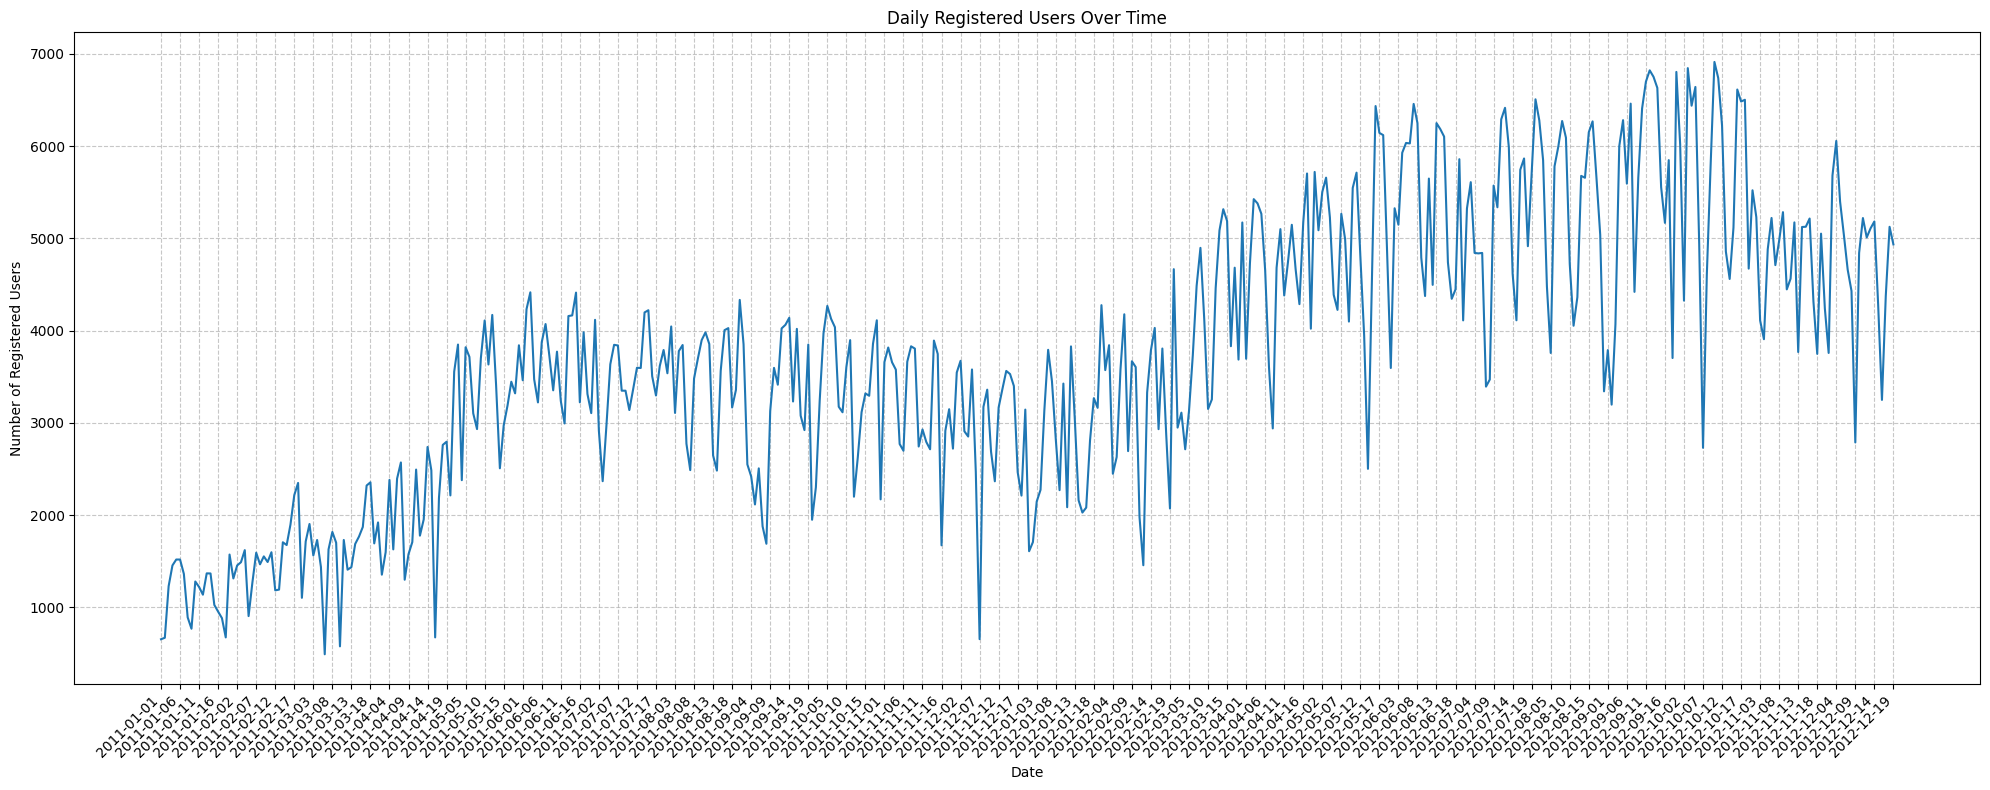

In [20]:
# Solution 2.
# Step 1. Create figure with larger size
plt.figure(figsize=(20, 8))

# Step 2. Create the plot
plt.plot(df_registered_by_date['date'], df_registered_by_date['registered'])

# Step 3. Add labels and title
plt.xlabel('Date')
plt.ylabel('Number of Registered Users')
plt.title('Daily Registered Users Over Time')

# Step 3. Improve x-axis readability
# Show only every 5th label
n = 5
plt.xticks(range(0, len(df_registered_by_date), n),
           df_registered_by_date['date'][::n],
           rotation=45,
           ha='right')

# Step 4. Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Step 5. Adjust layout
plt.tight_layout()


# **Analysis of trends:**

**1. Overall Growth Pattern:**

*   There appears to be an overall upward trend in registrations over time
*   This suggests increasing popularity of the bike rental service


**2. Seasonal Patterns:**

*   Higher registration numbers during warmer months (spring/summer)
*   Lower registrations during winter months
*   This makes sense as weather significantly impacts bike usage


**3. Weekly Patterns:**

*   Peaks often appear on weekdays
*   Lower registrations on weekends
*   This suggests heavy commuter usage

**4. Possible Factors:**

*   Weather conditions
*   Work/school commuting patterns
*   Marketing campaigns
*   Service expansion
*   Seasonal events or tourism

6. Побудуйте графік розсіювання (scatterplot) між температурою і тим, як вона відчувається (atemp). Поставте прозорість точок 0.2. Додайте підписи до осей Х ат У. Опишіть свої спостереження з цього графіку. Які висновки можна зробити? Що дивного бачите?

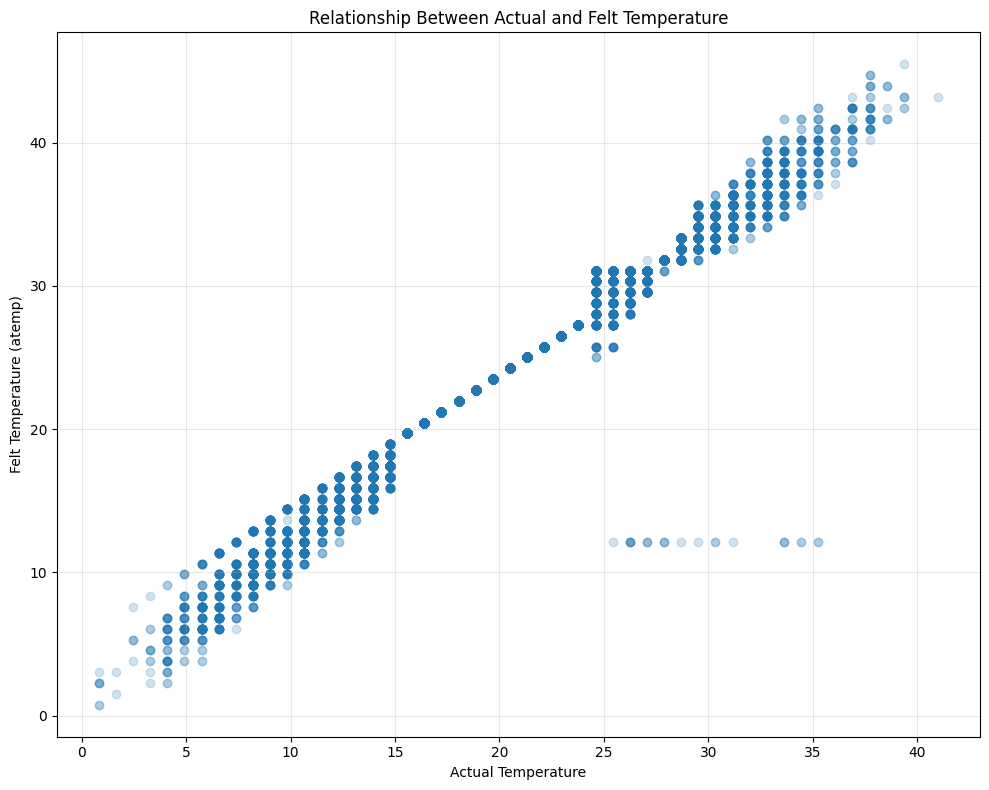

In [25]:
# Solution 1
# Step 1. Create scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(df['temp'], df['atemp'], alpha=0.2)

# Step 2. Add labels and title
plt.xlabel('Actual Temperature')
plt.ylabel('Felt Temperature (atemp)')
plt.title('Relationship Between Actual and Felt Temperature')

# Step 3. Add grid for better readability
plt.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout();


  Очікуваний графік:
![](https://drive.google.com/uc?export=view&id=13Mi6AGPUh5aQ5YEZjrlkQPuFcNzeeppB)


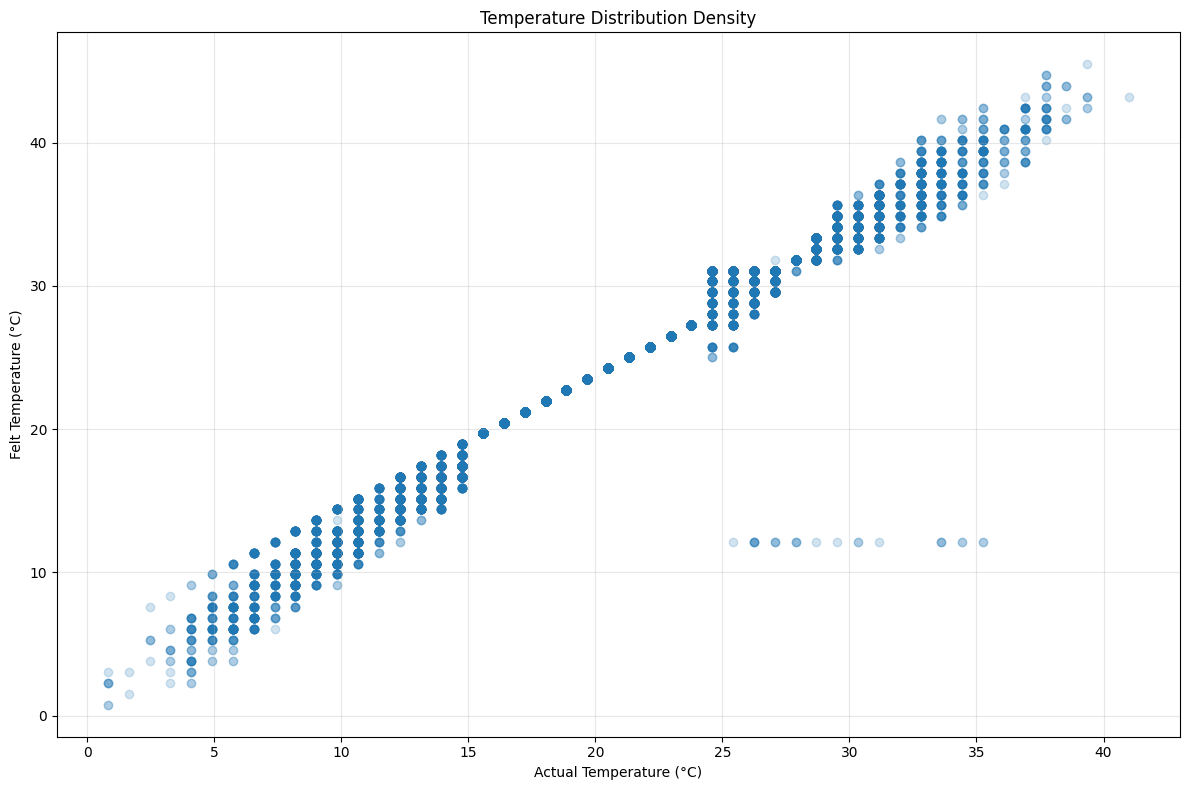

In [26]:
# Solution 2.
# Step 1. Create scatter plot with larger size
plt.figure(figsize=(12, 8))
plt.scatter(df['temp'], df['atemp'], alpha=0.2)

# Step 2. Add labels and title
plt.xlabel('Actual Temperature (°C)')
plt.ylabel('Felt Temperature (°C)')
plt.title('Temperature Distribution Density')

# Step 3. Add grid
plt.grid(True, alpha=0.3)

plt.tight_layout();


In [27]:
# Additional step
# Calculate and show temperature distribution
temp_ranges = df['temp'].value_counts(bins=5).sort_index()
print("\nActual Temperature Ranges (°C) and their frequencies:")
print(temp_ranges)


Actual Temperature Ranges (°C) and their frequencies:
(0.779, 8.856]       717
(8.856, 16.892]     3331
(16.892, 24.928]    3340
(24.928, 32.964]    3095
(32.964, 41.0]       403
Name: count, dtype: int64


Based on the darker areas in the scatter plot and temperature distribution:

Most Frequent Ranges:

1. 20-25°C (moderate temperatures)
Appears as the darkest cluster
Represents typical comfortable temperatures
2. 15-20°C and 25-30°C (mild to warm)
Second most frequent ranges
Shows moderate weather conditions
Less Frequent Ranges:

Below 15°C (cold)
Above 30°C (very hot)
This distribution likely reflects the climate of the region where the bike rental service operates, with most rentals occurring in moderate temperature conditions.